In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import ensemble
%matplotlib inline

In [4]:
df = pd.read_excel('LR.xlsx') 

In [5]:
df.head(10)

,Input,Output
0,6,76
1,16,10
2,9,44
3,8,47
4,14,23
5,11,19
6,12,13
7,10,19
8,18,8
9,5,44


In [169]:
x = df['Input']

In [170]:
y = df['Output']

In [171]:
x = np.array(x)

In [172]:
x =x.reshape(-1,1)

In [173]:
Lin = LinearRegression()

In [174]:
Linfit = Lin.fit(x,y)

In [175]:
ypred = Linfit.predict(x)

In [176]:
ypred

array([43.53107089, 17.53559578, 35.73242836, 38.33197587, 22.7346908 ,
       30.53333333, 27.93378582, 33.13288084, 12.33650075, 46.1306184 ,
       -8.45987934, 38.33197587, 38.33197587, 35.73242836, 46.1306184 ])

In [177]:
Lin.coef_

array([-2.59954751])

In [178]:
Lin.intercept_

59.12835595776774

In [179]:
%matplotlib inline

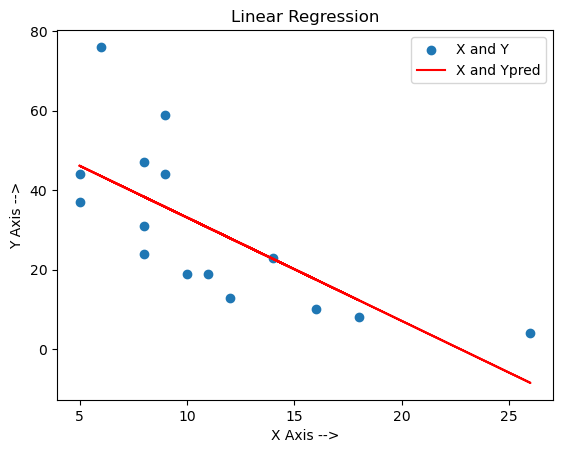

In [39]:
plt.scatter(x,y, label= 'X and Y')
plt.plot(x,ypred, c='red',label= 'X and Ypred')
plt.title('Linear Regression')
plt.xlabel('X Axis -->')
plt.ylabel('Y Axis -->')
plt.legend()

In [180]:
#more summary from our  regression
import statsmodels.api as sm

In [187]:
x = sm.add_constant(x)

In [218]:
Linsum = sm.OLS(y,x).fit()

In [219]:
Linsum.summary()

C:\Users\DELL\anaconda3\New folder\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     13.52
Date:                Mon, 07 Nov 2022   Prob (F-statistic):            0.00279
Time:                        20:20:25   Log-Likelihood:                -60.697
No. Observations:                  15   AIC:                             125.4
Df Residuals:                      13   BIC:                             126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1284      8.673      6.817      0.000      40.390      77.866
x1            -2.5995      0.707     -3.676      0.003      -4.127      -1.072
==============================================================================
Omnibus:                        3.641   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.249
Skew:                           0.948   Prob(JB):                        0.325
Kurtosis:                       2.911   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Classifier

In [26]:
fd = pd.read_excel('Dsp.xlsx')

In [27]:
fd

,User,Time,Cofee,Age,Image Analyzed,Productivity
0,3.0,15.0,0.0,40.0,13.0,Bad
1,2.0,2.0,0.0,40.0,17.0,Good
2,1.0,14.0,1.0,40.0,16.0,Bad
3,1.0,20.0,0.0,36.0,12.0,Good
4,5.0,13.0,3.0,39.0,23.0,Good
...,...,...,...,...,...,...
194,2.0,21.0,1.0,30.0,10.0,Good
195,1.0,6.0,5.0,29.0,14.0,Good
196,1.0,5.0,0.0,65.0,14.0,Bad
197,2.0,17.0,3.0,32.0,NaN,Good


In [28]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            187 non-null    float64
 1   Time            190 non-null    float64
 2   Cofee           195 non-null    float64
 3   Age             196 non-null    float64
 4   Image Analyzed  195 non-null    float64
 5   Productivity    197 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


<AxesSubplot:>

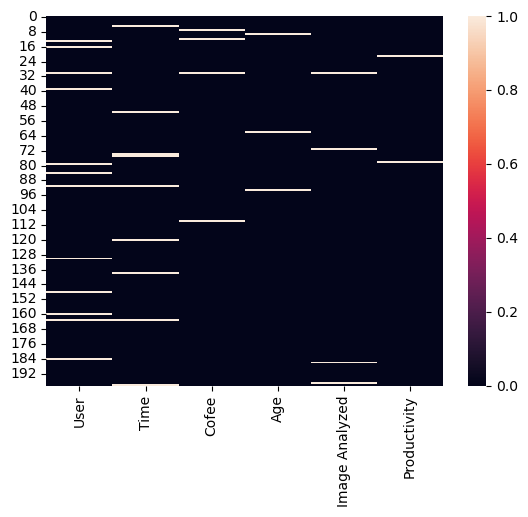

In [40]:
sns.heatmap(null)

In [54]:
fd['Productivity'].values_count()

AttributeError: 'Series' object has no attribute 'values_count'

<AxesSubplot:xlabel='Productivity', ylabel='count'>

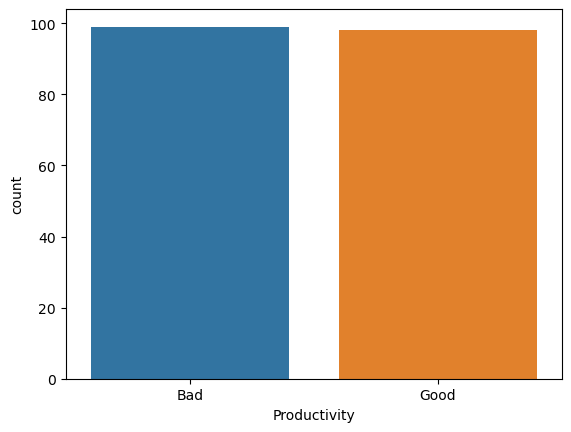

In [48]:
sns.countplot(fd['Productivity'])

In [55]:
fd.dropna(inplace=True)

In [59]:
fd.drop(['User','Image Analyzed'],axis =1,inplace=True)

In [61]:
fd.columns = fd.columns.str.lower()

In [62]:
fd['time'] =fd['time'].astype(int)

In [63]:
fd['cofee'] = fd['cofee'].astype(int)

In [65]:
fd['age'] = fd['age'].astype(int)

In [67]:
fd.productivity[fd['productivity'] == 'Good'] =1

C:\Users\DELL\AppData\Local\Temp\ipykernel_7332\1945655112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.productivity[fd['productivity'] == 'Good'] =1


In [68]:
fd.productivity[fd['productivity'] == 'Bad'] =0

C:\Users\DELL\AppData\Local\Temp\ipykernel_7332\1827050169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.productivity[fd['productivity'] == 'Bad'] =0


In [69]:
fd

,time,cofee,age,productivity
0,15,0,40,0
1,2,0,40,1
2,14,1,40,0
3,20,0,36,1
4,13,3,39,1
...,...,...,...,...
192,4,4,44,0
193,19,0,41,0
194,21,1,30,1
195,6,5,29,1


In [71]:
y1 = fd['productivity']

In [84]:
x1 = fd.drop('productivity',axis=1)

In [74]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   time    169 non-null    int32
 1   cofee   169 non-null    int32
 2   age     169 non-null    int32
dtypes: int32(3)
memory usage: 3.3 KB


In [76]:
y1 = y1.astype(int)

In [80]:
y1.dtypes

dtype('int32')

In [82]:
y1

0      0
1      1
2      0
3      1
4      1
      ..
192    0
193    0
194    1
195    1
196    0
Name: productivity, Length: 169, dtype: int32

In [86]:
x1.dtypes

time     int32
cofee    int32
age      int32
dtype: object

In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.3,random_state=10)

# Logistic Regression

In [91]:
Log = LogisticRegression()

In [92]:
Logfit = Log.fit(xtrain,ytrain)

In [93]:
Logypred = Log.predict(xtest)

In [94]:
Logypred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1])

In [95]:
Logyprob = Log.decision_function(xtest)

In [124]:
LogypredictingProbabilities =  Log.predict_proba(xtest)

In [96]:
print(Log.coef_)
print(Log.intercept_)

[[-0.00654347  0.03154772 -0.02707791]]
[1.10421422]


In [98]:
Log.score(xtest,ytest)

0.5098039215686274

In [101]:
print(confusion_matrix(ytest,Logypred))
print(classification_report(ytest,Logypred))

[[14 11]
 [14 12]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        25
           1       0.52      0.46      0.49        26

    accuracy                           0.51        51
   macro avg       0.51      0.51      0.51        51
weighted avg       0.51      0.51      0.51        51



<AxesSubplot:>

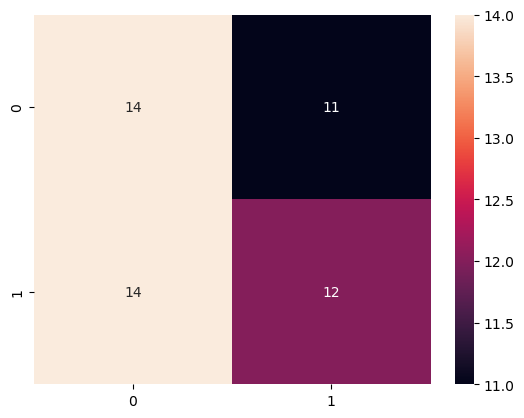

In [115]:
sns.heatmap(confusion_matrix(ytest,Logypred),annot=True)

# SVM

In [117]:
Sv = SVC(probability = True,kernel='linear')

In [118]:
Svfit = Sv.fit(xtrain,ytrain)

In [119]:
Svypred = Sv.predict(xtest)

In [125]:
Svyprob = Sv.decision_function(xtest)

In [126]:
SvypredictingProbalities = Sv.predict_proba(xtest)

In [128]:
print(Sv.coef_)
print(Sv.intercept_)

[[-3.24917404e-05 -9.47979150e-05 -5.88304551e-02]]
[2.53038587]


In [129]:
Sv.score(xtest,ytest)

0.47058823529411764

In [132]:
print(confusion_matrix(ytest,Svypred))
print(classification_report(ytest,Svypred))

[[11 14]
 [13 13]]
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        25
           1       0.48      0.50      0.49        26

    accuracy                           0.47        51
   macro avg       0.47      0.47      0.47        51
weighted avg       0.47      0.47      0.47        51



<AxesSubplot:>

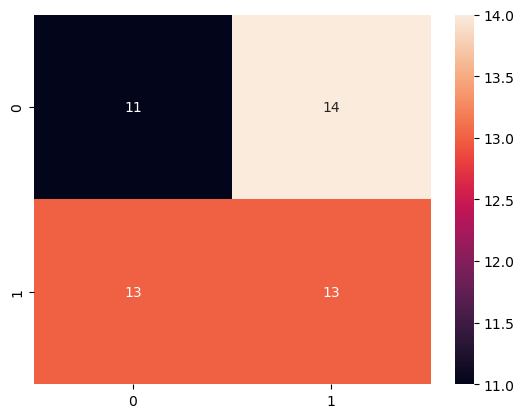

In [135]:
sns.heatmap(confusion_matrix(ytest,Svypred),annot=True)

# Random Forest

In [136]:
rand = ensemble.RandomForestClassifier(n_estimators=100)

In [154]:
rand.fit(xtrain,ytrain)

RandomForestClassifier()

In [155]:
yrandpred = rand.predict(xtest)

In [156]:
yrandprob = rand.decision_function(xtest)

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [157]:
yrandpredictingprobalities = rand.predict_proba(xtest)

In [158]:
#print(rand.coef_)
#print(rand.intercept_)

In [159]:
rand.score(xtest,ytest)

0.5294117647058824

In [150]:
print(confusion_matrix(ytest,yrandpred))
print(classification_report(ytest,yrandpred))

[[16  9]
 [15 11]]
              precision    recall  f1-score   support

           0       0.52      0.64      0.57        25
           1       0.55      0.42      0.48        26

    accuracy                           0.53        51
   macro avg       0.53      0.53      0.52        51
weighted avg       0.53      0.53      0.52        51



<AxesSubplot:>

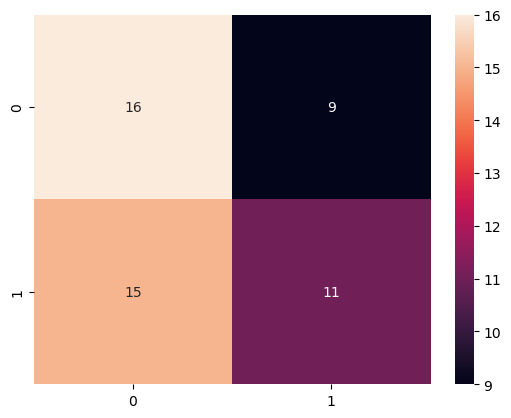

In [160]:
sns.heatmap(confusion_matrix(ytest,yrandpred),annot=True)

# Decision Tree

In [152]:
DT = tree.DecisionTreeClassifier(max_depth = 10)

In [153]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=10)

In [161]:
Dtypred = DT.predict(xtest)

In [162]:
Dtyprob = DT.decision_function(xtest)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [163]:
Dtpredictingprobalities = DT.predict_proba(xtest)

In [165]:
print(confusion_matrix(ytest,Dtypred))
print(classification_report(ytest,Dtypred))

[[18  7]
 [16 10]]
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        25
           1       0.59      0.38      0.47        26

    accuracy                           0.55        51
   macro avg       0.56      0.55      0.54        51
weighted avg       0.56      0.55      0.54        51



<AxesSubplot:>

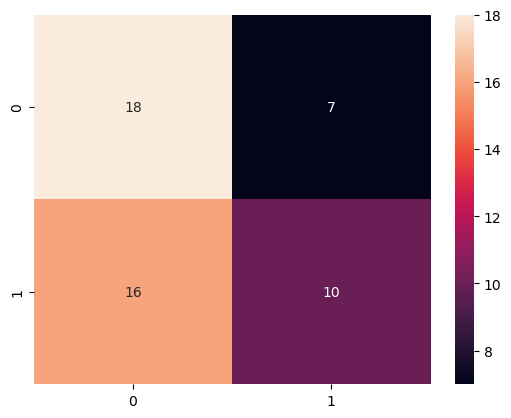

In [167]:
sns.heatmap(confusion_matrix(ytest,Dtypred), annot=True)

In [168]:
DT.score(xtest,ytest)

0.5490196078431373

# Calculating ROC and AUC

In [214]:
LogFPR,LogTPR, threshold = roc_curve(ytest,Logyprob)

In [215]:
LogAUC = auc(LogFPR,LogTPR)

In [216]:
SvFPR,SvTPR, threshold = roc_curve(ytest,Svyprob)

In [217]:
SvAUC = auc(SvFPR,SvTPR)

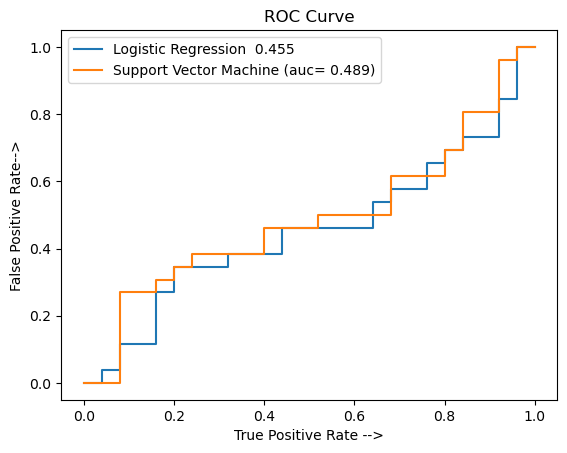

In [213]:
plt.plot(LogFPR,LogTPR,label='Logistic Regression  %0.3f' %(LogAUC))
plt.plot(SvFPR,SvTPR,label= 'Support Vector Machine (auc= %0.3f)' %(SvAUC))

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate-->')
plt.title('ROC Curve')
plt.legend()